#### `Import Libraries`

In [1]:



## main
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib
import missingno
import plotly.express as px

## other
from imblearn.over_sampling import SMOTE
from datasist.structdata import detect_outliers

## sklearn -- preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder,PowerTransformer, OrdinalEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE 
from sklearn.feature_selection import SelectKBest, f_classif
 

## scaling
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler


## sklearn --Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## sklearn -- models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.svm import SVC
## skelarn -- metrics


from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, precision_recall_curve, roc_auc_score, auc, confusion_matrix, classification_report, roc_curve

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

#### `Read the Dataset and Look at the big picture`

In [2]:
## using pandas
TRAIN_DATA_PATH = os.path.join(os.getcwd(),'train.csv')
df = pd.read_csv(TRAIN_DATA_PATH)

In [3]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
df.shape

(103904, 25)

In [5]:
## Check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [6]:
## stats
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


#### `EDA`

In [7]:
## drop un important columns
df.drop(columns=df[['Unnamed: 0','id']],axis=1 ,inplace=True)

In [8]:
## Check Nulls
df.isna().sum().sort_values(ascending=False)

Arrival Delay in Minutes             310
Gender                                 0
Seat comfort                           0
Departure Delay in Minutes             0
Cleanliness                            0
Inflight service                       0
Checkin service                        0
Baggage handling                       0
Leg room service                       0
On-board service                       0
Inflight entertainment                 0
Online boarding                        0
Customer Type                          0
Food and drink                         0
Gate location                          0
Ease of Online booking                 0
Departure/Arrival time convenient      0
Inflight wifi service                  0
Flight Distance                        0
Class                                  0
Type of Travel                         0
Age                                    0
satisfaction                           0
dtype: int64

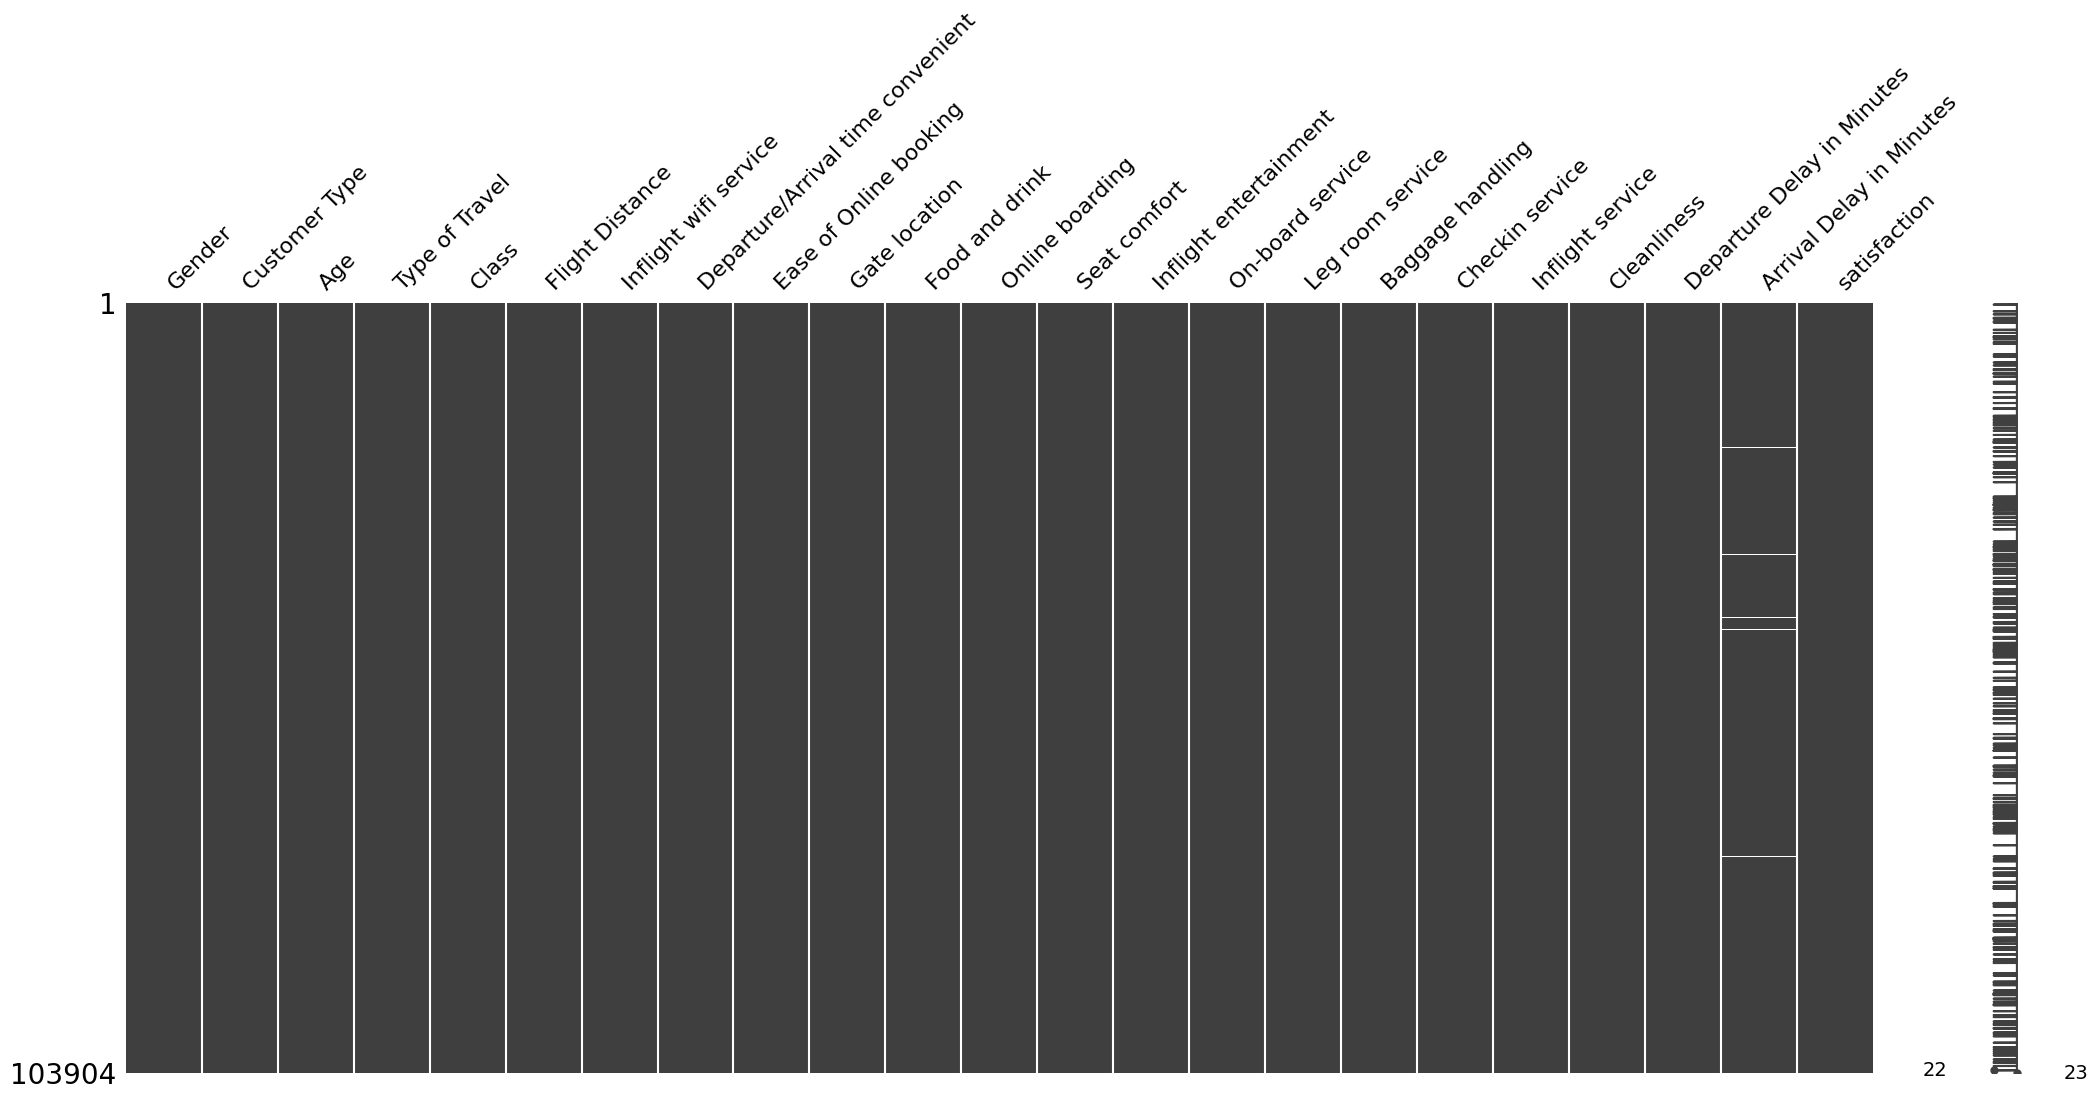

In [9]:
missingno.matrix(df)
plt.show()

In [10]:
## Check shape
df.shape

(103904, 23)

In [11]:
## Check dtypes
df.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

In [12]:
## check duplicates
df.duplicated().sum(axis=0)

0

In [13]:
## Check The target classes
df['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [14]:
## The target
df['satisfaction'].value_counts()  ## Imbalanced Dataset

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

In [15]:
df['Gender'].value_counts()

Gender
Female    52727
Male      51177
Name: count, dtype: int64

In [16]:
df.groupby(['Gender','Class'])['Customer Type'].count().to_frame()

Customer Type
Gender Class                  
Female Business          24927
       Eco               23858
       Eco Plus           3942
Male   Business          24738
       Eco               22887
       Eco Plus           3552

In [17]:
df.groupby(['Gender','Class','Customer Type'])['Gender'].count().to_frame()

Gender
Gender Class    Customer Type            
Female Business Loyal Customer      21115
                disloyal Customer    3812
       Eco      Loyal Customer      17963
                disloyal Customer    5895
       Eco Plus Loyal Customer       3380
                disloyal Customer     562
Male   Business Loyal Customer      21194
                disloyal Customer    3544
       Eco      Loyal Customer      17872
                disloyal Customer    5015
       Eco Plus Loyal Customer       3399
                disloyal Customer     153

#### `Data Viz & Handling Outliers`

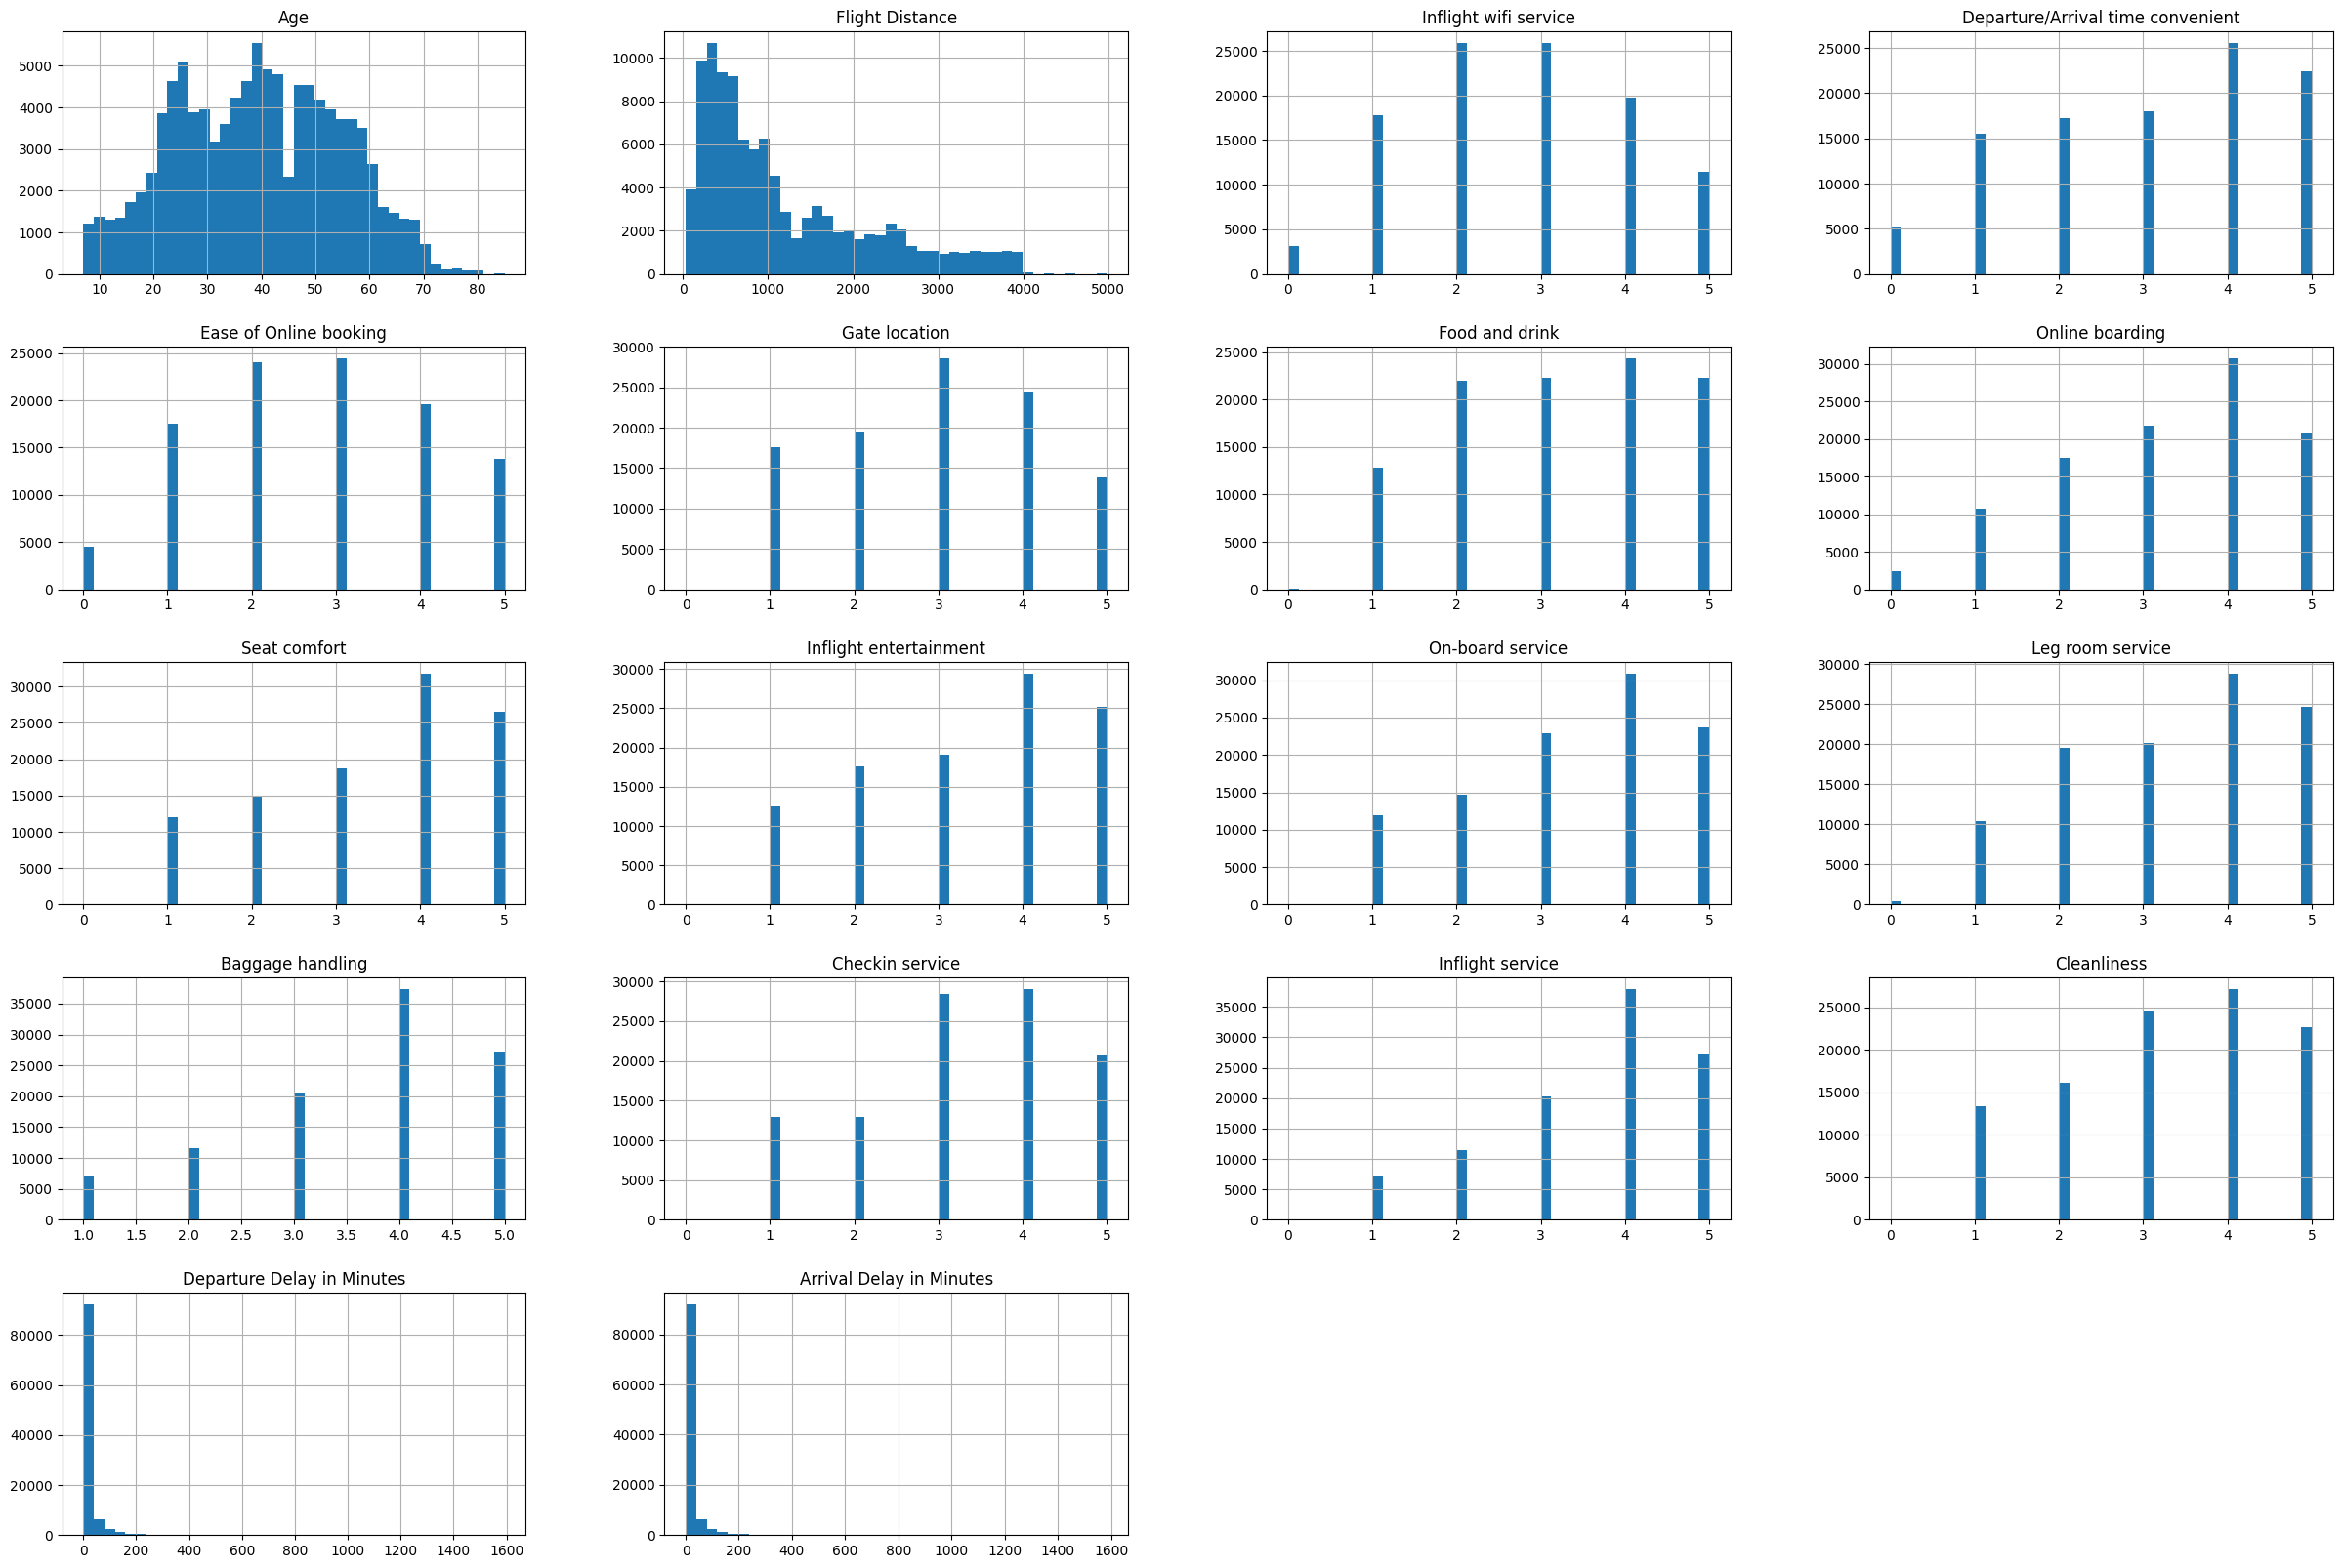

In [18]:
## For Numerical
df.hist(bins=40, figsize=(30, 20))
plt.show()

In [19]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

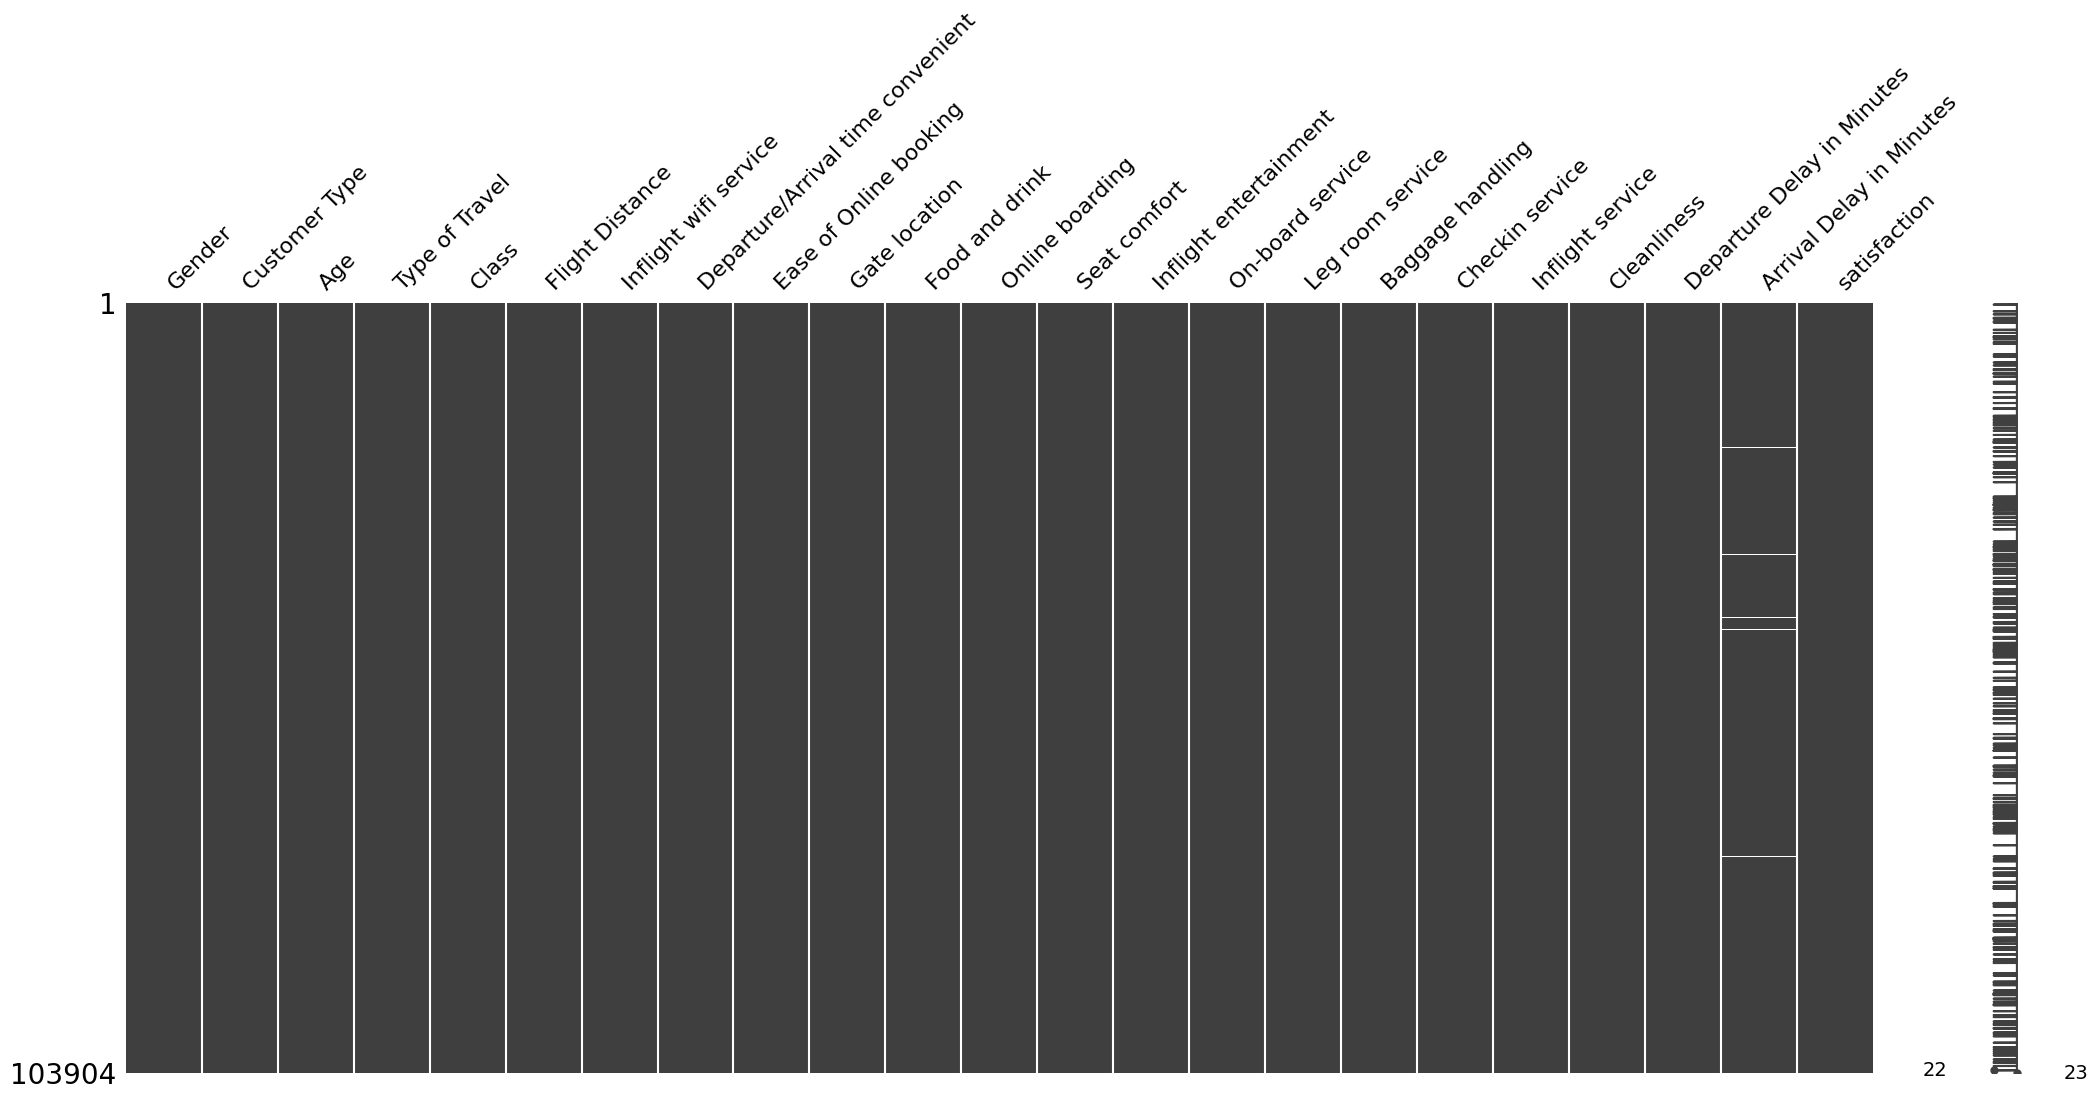

In [20]:
missingno.matrix(df)
plt.show()

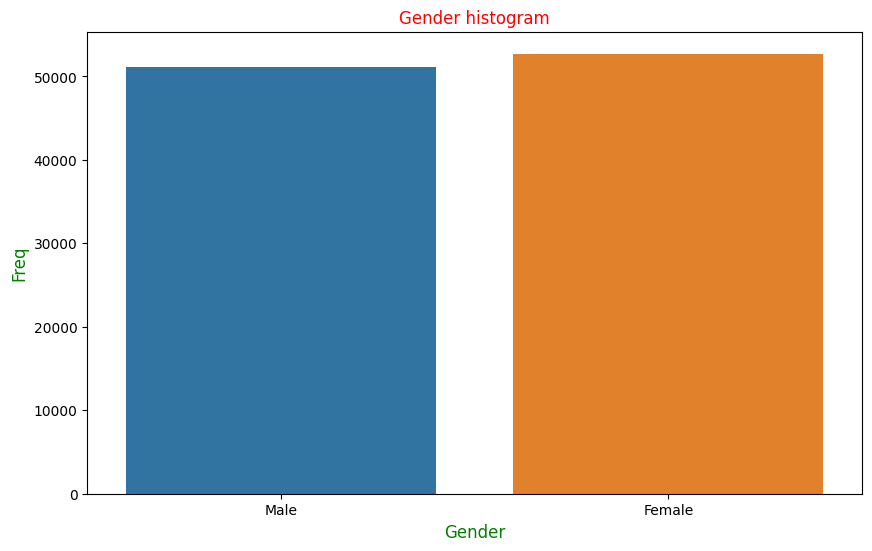

In [21]:
# the count of mens & womens

plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Gender')
plt.xlabel('Gender',color='g',fontsize=12)
plt.ylabel('Freq',color='g',fontsize=12)
plt.title('Gender histogram',fontsize=12,color='r')
plt.show()


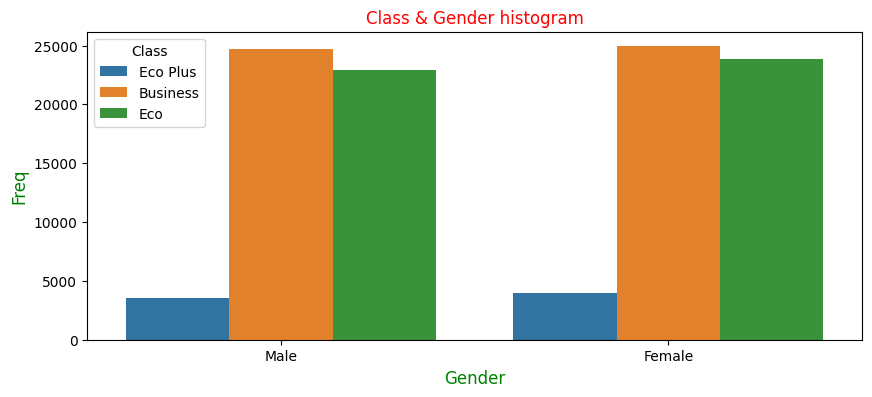

In [22]:
# the Class budget Type according to gender

plt.figure(figsize=(10,4))
sns.countplot(data=df,x='Gender',hue='Class')
plt.xlabel('Gender',color='g',fontsize=12)
plt.ylabel('Freq',color='g',fontsize=12)
plt.title('Class & Gender histogram',fontsize=12,color='r')
plt.show()

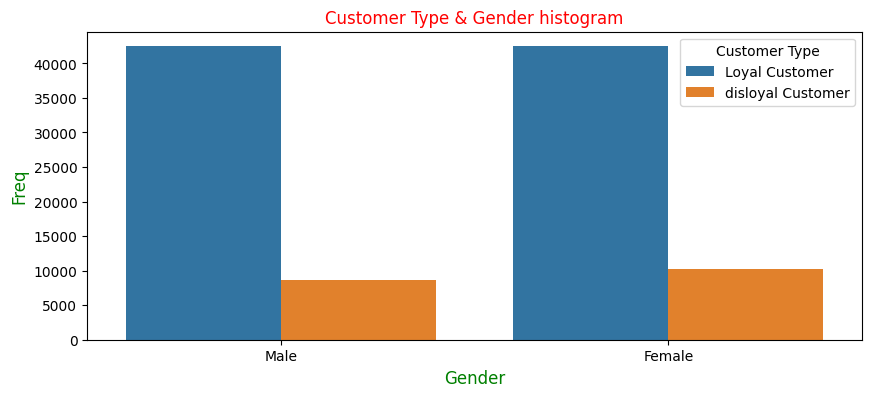

In [23]:
# the Customer Type according to gender

plt.figure(figsize=(10,4))
sns.countplot(data=df,x='Gender',hue='Customer Type')
plt.xlabel('Gender',color='g',fontsize=12)
plt.ylabel('Freq',color='g',fontsize=12)
plt.title('Customer Type & Gender histogram',fontsize=12,color='r')
plt.show()

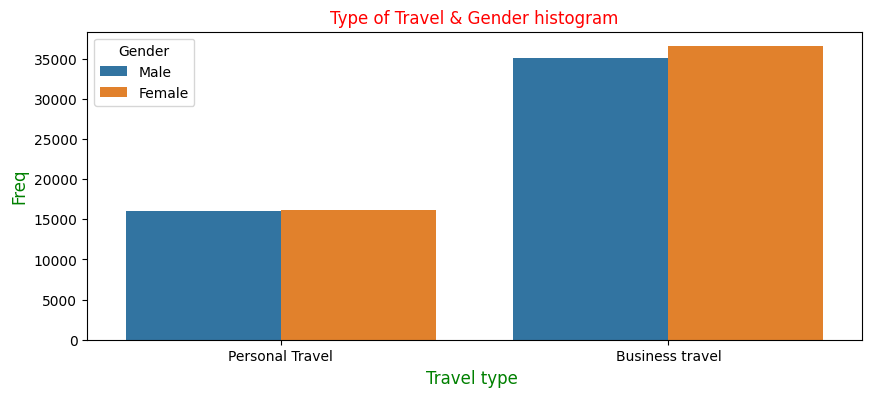

In [24]:
# the type of travel according to gender

plt.figure(figsize=(10,4))
sns.countplot(data=df,x='Type of Travel',hue='Gender')
plt.xlabel('Travel type ',color='g',fontsize=12)
plt.ylabel('Freq',color='g',fontsize=12)
plt.title('Type of Travel & Gender histogram',fontsize=12,color='r')
plt.show()

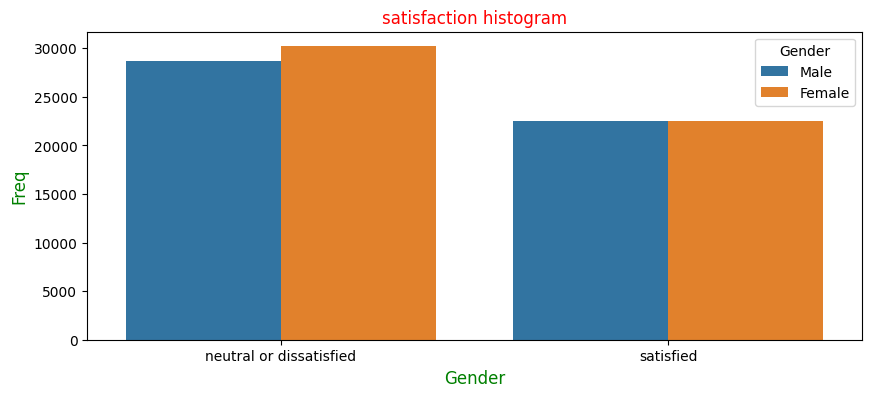

In [25]:
#satisfaction  of gender histogram

plt.figure(figsize=(10,4))
sns.countplot(data=df,x='satisfaction',hue='Gender')
plt.xlabel('Gender',color='g',fontsize=12)
plt.ylabel('Freq',color='g',fontsize=12)
plt.title('satisfaction histogram',fontsize=12,color='r')
plt.show()

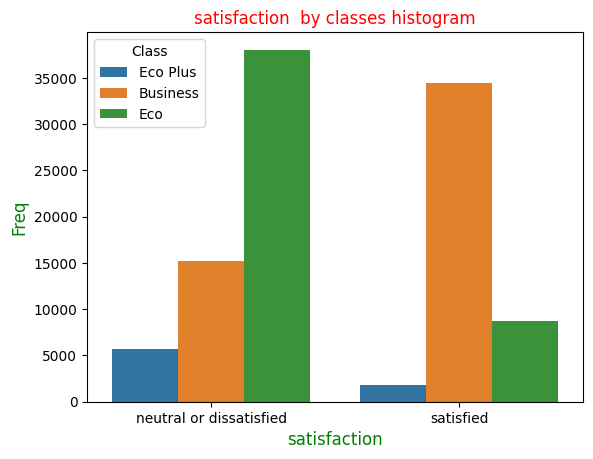

In [26]:
sns.countplot(data=df,x='satisfaction',hue='Class')
plt.xlabel('satisfaction',color='g',fontsize=12)
plt.ylabel('Freq',color='g',fontsize=12)
plt.title('satisfaction  by classes histogram',fontsize=12,color='r')
plt.show()

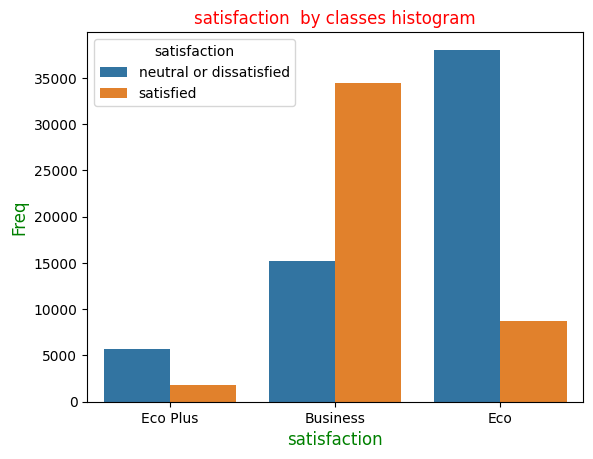

In [27]:
sns.countplot(data=df,x='Class',hue='satisfaction')
plt.xlabel('satisfaction',color='g',fontsize=12)
plt.ylabel('Freq',color='g',fontsize=12)
plt.title('satisfaction  by classes histogram',fontsize=12,color='r')
plt.show()

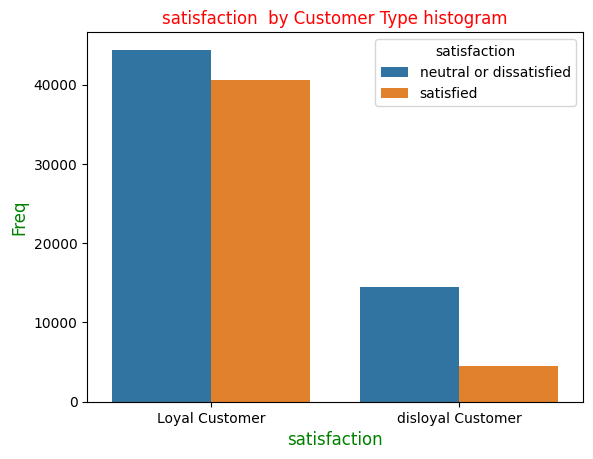

In [28]:
#satisfaction  by Customer Type histogram

sns.countplot(data=df,x='Customer Type',hue='satisfaction')
plt.xlabel('satisfaction',color='g',fontsize=12)
plt.ylabel('Freq',color='g',fontsize=12)
plt.title('satisfaction  by Customer Type histogram',fontsize=12,color='r')
plt.show()

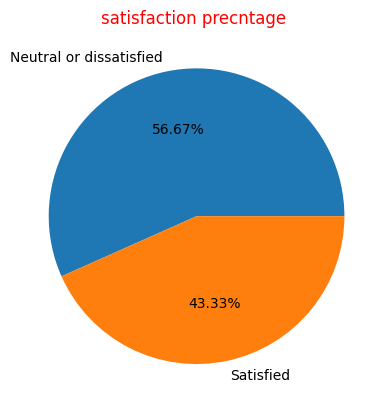

In [29]:
#satisfaction precntage

plt.pie(df.satisfaction.value_counts(),
labels=["Neutral or dissatisfied", "Satisfied"], autopct='%1.2f%%')

plt.title('satisfaction precntage ',fontsize=12,color='r')

plt.show()

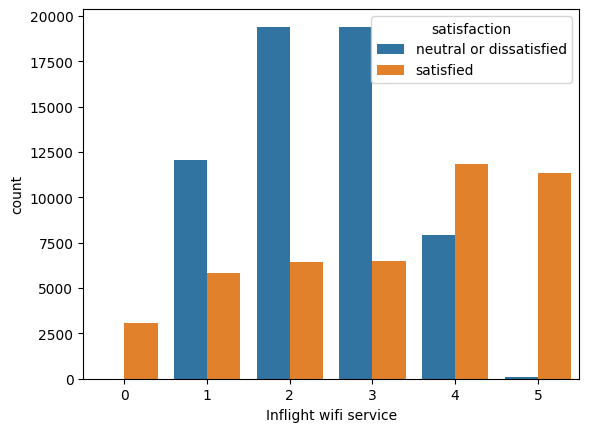

In [30]:
#satisfaction of Inflight wifi service

sns.countplot(x = 'Inflight wifi service', hue = 'satisfaction', data = df)
plt.show()

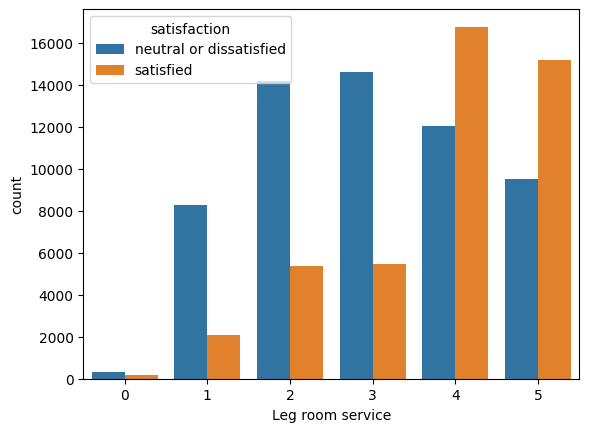

In [31]:
#satisfaction of Leg room service

sns.countplot(x = 'Leg room service', hue = 'satisfaction', data = df)
plt.show()

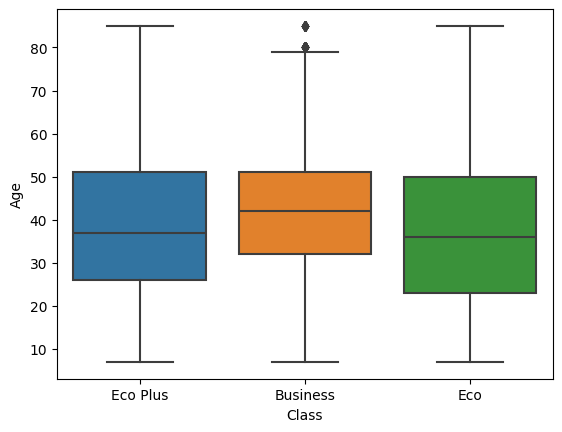

In [32]:


## Check the Distribution of Age with every class
sns.boxplot(data=df,y='Age',x='Class')
plt.show()

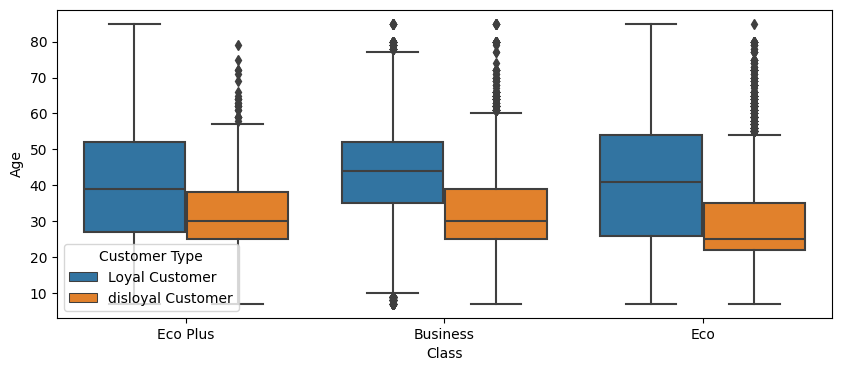

In [33]:
## Check the Distribution of Age with  Customer Type

plt.figure(figsize=(10,4))
sns.boxplot(data=df,y='Age',x='Class', hue='Customer Type')
plt.show()

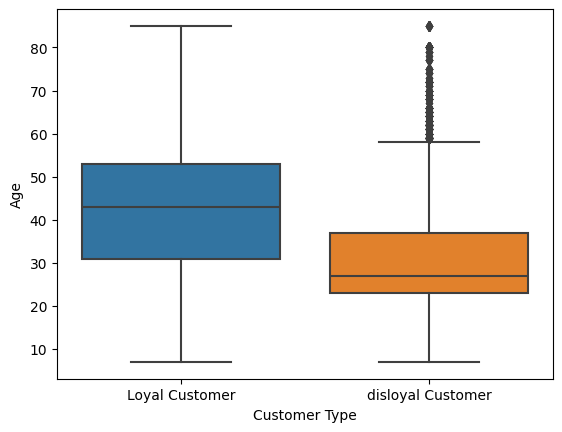

In [34]:
sns.boxplot(data=df,y='Age',x='Customer Type')
plt.show()

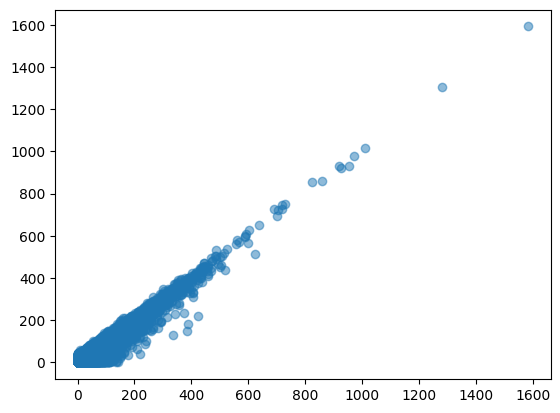

In [35]:
# corr between Arrival Delay in Minutes & Departure Delay in Minutes
plt.scatter (df['Arrival Delay in Minutes'], df['Departure Delay in Minutes'], alpha = 0.5)
plt.show()

In [36]:

num_cols = df.select_dtypes(include='number').columns.tolist()
num_cols

['Age',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

In [37]:
categ_cols = df.select_dtypes(exclude='number').columns.tolist()
categ_cols

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

In [38]:
df.isna().sum().sort_values(ascending=False) / df.shape[0]

Arrival Delay in Minutes             0.002984
Gender                               0.000000
Seat comfort                         0.000000
Departure Delay in Minutes           0.000000
Cleanliness                          0.000000
Inflight service                     0.000000
Checkin service                      0.000000
Baggage handling                     0.000000
Leg room service                     0.000000
On-board service                     0.000000
Inflight entertainment               0.000000
Online boarding                      0.000000
Customer Type                        0.000000
Food and drink                       0.000000
Gate location                        0.000000
Ease of Online booking               0.000000
Departure/Arrival time convenient    0.000000
Inflight wifi service                0.000000
Flight Distance                      0.000000
Class                                0.000000
Type of Travel                       0.000000
Age                               

#### `Split dataset to (Train, valid)`

In [39]:
# We use .map() on a specific column and provide a dictionary to perform the mapping
df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1})

In [40]:
df['satisfaction'].value_counts()

satisfaction
0    58879
1    45025
Name: count, dtype: int64

In [41]:
df['satisfaction'].astype

<bound method NDFrame.astype of 0         0
1         0
2         1
3         0
4         1
         ..
103899    0
103900    1
103901    0
103902    0
103903    0
Name: satisfaction, Length: 103904, dtype: int64>

In [42]:
X=df.drop(columns=['satisfaction'],axis=1)
y = df['satisfaction']

In [43]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [44]:
## split to train and valid
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.10, shuffle=True, random_state=35)

In [45]:
print('X_valid.shape \t', X_valid.shape)
print('y_valid.shape \t', y_valid.shape)
print('**'*20)
print('X_train.shape \t', X_train.shape)
print('y_train.shape \t', y_train.shape)

X_valid.shape 	 (10391, 22)
y_valid.shape 	 (10391,)
****************************************
X_train.shape 	 (93513, 22)
y_train.shape 	 (93513,)


In [46]:
## Slicing cols according to their datatypes
num_cols = X_train.select_dtypes(include='number').columns.tolist()
categ_cols = X_train.select_dtypes(exclude='number').columns.tolist()
print('Numerical cols \t', num_cols)
print('Categorical cols \t', categ_cols)

Numerical cols 	 ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
Categorical cols 	 ['Gender', 'Customer Type', 'Type of Travel', 'Class']


In [47]:
## My Pipline:
## Numerical: imputing using (median) and  then standardize with  StandardScaler()
## categorical:imputing using (mode) and label encoding


## Numerical pipeline
num_pipeline = Pipeline(steps=[
                    ('selector', DataFrameSelector(num_cols)),
                    ('imputer', SimpleImputer(strategy='median')),
                    ('standardize', StandardScaler())
                    ])

## Categorical Pipeline
categ_pipeline = Pipeline(steps=[
                        ('selector', DataFrameSelector(categ_cols)),
                        ('imputer', SimpleImputer(strategy='most_frequent')),
                        ('encder', OrdinalEncoder())
                    ])

## Get all together
all_pipeline = FeatureUnion(transformer_list=[
                                ('numerical', num_pipeline),
                                ('category', categ_pipeline)
                                ])

## applY
X_train_final = all_pipeline.fit_transform(X_train)
X_valid_final = all_pipeline.transform(X_valid)

In [48]:

print('X_train_final.shape \t', X_train_final.shape)
print('y_train.shape \t', y_train.shape)
print('**'*20)
print('X_valid_final.shape \t', X_valid_final.shape)
print('y_valid.shape \t', y_valid.shape)  ## fine

X_train_final.shape 	 (93513, 22)
y_train.shape 	 (93513,)
****************************************
X_valid_final.shape 	 (10391, 22)
y_valid.shape 	 (10391,)


In [49]:
## 1. Using the simplest method the class_weights
vals_count =  1 - (np.bincount(y_train) / len(y_train))
vals_count = vals_count / np.sum(vals_count)

dict_weights = {}
for i in range(2):  ## 2 classes (0, 1)
    dict_weights[i] = vals_count[i]

dict_weights

{0: 0.43218589928673024, 1: 0.5678141007132698}

In [50]:
## 11. RandomUnderSampler بتصغر الكلاس الكبير الى نفس العدد بتاع الكلاس الصغير 

#RandomUnder=RandomUnderSampler(sampling_strategy="auto",random_state=45)


#X_train_resampled, y_train_resampled = RandomUnder.fit_resample(X_train_final, y_train)  ## for train

#y_train_resampled.value_counts(), y_train.value_counts()

In [51]:
## 12. SMOTE بتكبر الكلاس الصغير الى نفس العدد بتاع الكلاس الكبير 
over = SMOTE(sampling_strategy="auto",random_state=45)
X_train_resampled, y_train_resampled = over.fit_resample(X_train_final, y_train)  ## for train
y_train_resampled.value_counts(),y_train.value_counts()


(satisfaction
 1    53098
 0    53098
 Name: count, dtype: int64,
 satisfaction
 0    53098
 1    40415
 Name: count, dtype: int64)

In [52]:
print('X_train_final_resampled.shape \t', X_train_resampled.shape)
print('y_train_resampled.shape \t', y_train_resampled.shape)
print('**'*20)
print('X_valid_final.shape \t', X_valid_final.shape)
print('y_valid.shape \t', y_valid.shape)  ## fine

X_train_final_resampled.shape 	 (106196, 22)
y_train_resampled.shape 	 (106196,)
****************************************
X_valid_final.shape 	 (10391, 22)
y_valid.shape 	 (10391,)


#### `Budiling Models`



* ` Using Algorthim ( RF )`` I will use cross validation & Cosnider evaluation metric to be (f1_score)`

In [53]:
forest_clf = RandomForestClassifier(n_estimators=150, max_depth=5, class_weight=dict_weights, random_state=45,max_features=0.8)
forest_clf.fit(X_train_final, y_train)

## predict and evaluate
y_pred_train_forest = forest_clf.predict(X_train_final)
y_pred_valid_forest = forest_clf.predict(X_valid_final)

score_train_forest = f1_score(y_train, y_pred_train_forest)
score_valid_forest = f1_score(y_valid, y_pred_valid_forest)

print('F1 Score using the RF Model for Training Dataset \t', score_train_forest)
print('F1 Score using the RF Model for Validating Dataset \t', score_valid_forest)

F1 Score using the RF Model for Training Dataset 	 0.914985748074474
F1 Score using the RF Model for Validating Dataset 	 0.9122956949043904


* ` Using anthor Algorthim ( KNN )`

In [54]:
## Using knn using SMOTE Approach
knn_clf = KNeighborsClassifier(n_neighbors=5, p=4, n_jobs=-1)
knn_clf.fit(X_train_resampled, y_train_resampled)  ## SMOTE

## Predict and evaluate 
y_pred_train_knn = knn_clf.predict(X_train_final)
y_pred_valid_knn = knn_clf.predict(X_valid_final)

## Evaluate
score_train_knn = f1_score(y_train, y_pred_train_knn)
score_valid_knn = f1_score(y_valid, y_pred_valid_knn)

print(f'F1 Score for Training Dataset using KNN after SMOTE {score_train_knn * 100 :.3f}')

print(f'F1 Score for Testing Dataset using KNN after SMOTE {score_valid_knn * 100 :.3f}')

F1 Score for Training Dataset using KNN after SMOTE 93.789
F1 Score for Testing Dataset using KNN after SMOTE 90.373


 Logistic Regression

In [55]:
## Using Logistic Reg taking into cosideration class_weights
log_clf = LogisticRegression(penalty=None, class_weight=dict_weights, 
                             max_iter=10000, multi_class='auto')
log_clf.fit(X_train_final, y_train)  ## without SMOTE

## Predict and evaluate 
y_pred_train_log = log_clf.predict(X_train_final)
y_pred_valid_log = log_clf.predict(X_valid_final)

## Evaluate
score_train_log = f1_score(y_train, y_pred_train_log)
score_valid_log = f1_score(y_valid, y_pred_valid_log)

print(f'F1 Score for Training Dataset using Logisitic with class_weights {score_train_log * 100 :.3f}')
print(f'F1 Score for valid Dataset using Logisitic after class_weights {score_valid_log * 100 :.3f}')

F1 Score for Training Dataset using Logisitic with class_weights 85.022
F1 Score for valid Dataset using Logisitic after class_weights 85.324


* Naive Bayes

In [56]:
## Gaussian NB OR Bernolii, Multinomail (Only positive dataset)
naive_clf = GaussianNB()
naive_clf.fit(X_train_resampled, y_train_resampled)  ## USING Smote

# Predict and evaluate 
y_pred_train_naive = naive_clf.predict(X_train_final)
y_pred_valid_naive = naive_clf.predict(X_valid_final)

## Evaluate
score_train_naive = f1_score(y_train, y_pred_train_naive)
score_valid_naive = f1_score(y_valid, y_pred_valid_naive)

print(f'F1 Score for Training Dataset using Gaissian NB with SMOTE {score_train_naive * 100 :.3f}')
print(f'F1 Score for valid Dataset using Gaissian NB after SMOTE {score_valid_naive * 100 :.3f}')

F1 Score for Training Dataset using Gaissian NB with SMOTE 83.788
F1 Score for valid Dataset using Gaissian NB after SMOTE 83.974


* SVM

In [57]:
1 / X_train_final.shape[1]

0.045454545454545456

In [58]:
## SVM using class_weights

## Using poly
svc_clf_poly = SVC(C=2, kernel='poly', degree=3, class_weight=dict_weights)
svc_clf_poly.fit(X_train_final, y_train)  ## without SMOTE


## Predict and evaluate 
y_pred_train_poly = svc_clf_poly.predict(X_train_final)
y_pred_valid_poly = svc_clf_poly.predict(X_valid_final)

## Evaluate using f1 score
score_train_poly = f1_score(y_train, y_pred_train_poly)
score_valid_poly = f1_score(y_valid, y_pred_valid_poly)

print(f'F1 Score for Training Dataset using SVC with poly kernel with class_weights {score_train_poly * 100 :.3f}')
print(f'F1 Score for valid Dataset using SVC with poly kernel with class_weights {score_valid_poly * 100 :.3f}')

F1 Score for Training Dataset using SVC with poly kernel with class_weights 92.963
F1 Score for valid Dataset using SVC with poly kernel with class_weights 92.430


In [59]:
## using RBF
svc_clf_rbf = SVC(C=2, kernel='rbf', gamma=0.1, class_weight=dict_weights, probability=True)
svc_clf_rbf.fit(X_train_final, y_train)  ## without SMOTE

## Predict and evaluate 
y_pred_train_rbf = svc_clf_rbf.predict(X_train_final)
y_pred_valid_rbf = svc_clf_rbf.predict(X_valid_final)

## Evaluate using f1 score
score_train_rbf = f1_score(y_train, y_pred_train_rbf)
score_valid_rbf = f1_score(y_valid, y_pred_valid_rbf)

print(f'F1 Score for Training Dataset using SVC with RBF kernel with class_weights {score_train_rbf * 100 :.3f}')
print(f'F1 Score for valid Dataset using SVC with RBF kernel with class_weights {score_valid_rbf * 100 :.3f}')

F1 Score for Training Dataset using SVC with RBF kernel with class_weights 95.862
F1 Score for valid Dataset using SVC with RBF kernel with class_weights 94.845


* Decision Trees

In [60]:
## DT using SMOTE
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, splitter='best', max_leaf_nodes=10)
tree_clf.fit(X_train_resampled, y_train_resampled)  ## using SMOTE

# Predict and evaluate 
y_pred_train_tree = tree_clf.predict(X_train_final)
y_pred_valid_tree = tree_clf.predict(X_valid_final)

## Evaluate
score_train_tree = f1_score(y_train, y_pred_train_tree)
score_valid_tree = f1_score(y_valid, y_pred_valid_tree)

print(f'F1 Score for Training Dataset using Decision Trees with SMOTE {score_train_tree * 100 :.3f}')
print(f'F1 Score for valid Dataset using Decision Trees with SMOTE {score_valid_tree * 100 :.3f}')

F1 Score for Training Dataset using Decision Trees with SMOTE 87.382
F1 Score for valid Dataset using Decision Trees with SMOTE 87.286


dump models

In [61]:
joblib.dump(forest_clf,'forest_model.pkl')

['forest_model.pkl']

In [62]:
joblib.dump(knn_clf,'KNN.model.pkl')

['KNN.model.pkl']

In [63]:
joblib.dump(log_clf,'LogReg_model.pkl')

['LogReg_model.pkl']

In [64]:
joblib.dump(naive_clf,'NB_model.pkl')

['NB_model.pkl']

In [65]:
joblib.dump(svc_clf_rbf,'SVM_model.pkl')

['SVM_model.pkl']

In [66]:
joblib.dump(tree_clf,'decision_tree.pkl')

['decision_tree.pkl']

In [75]:
listx={'Random Forest':score_valid_forest,
       'KNN':score_valid_knn,
       'Log_Reg':score_valid_log ,
       'Naive_Baise':score_valid_naive,
       'SVM_poly kernel':score_valid_poly,
       'SVM_rbf kernel':score_valid_rbf,
       'Decision_Tree':score_valid_tree}

for i in listx:
            
       print(f'F1 Score using the {i} Model for Validating Dataset = {listx[i]* 100:.1f}')


F1 Score using the Random Forest Model for Validating Dataset = 91.2
F1 Score using the KNN Model for Validating Dataset = 90.4
F1 Score using the Log_Reg Model for Validating Dataset = 85.3
F1 Score using the Naive_Baise Model for Validating Dataset = 84.0
F1 Score using the SVM_poly kernel Model for Validating Dataset = 92.4
F1 Score using the SVM_rbf kernel Model for Validating Dataset = 94.8
F1 Score using the Decision_Tree Model for Validating Dataset = 87.3


In [68]:
# from the previous step we note that 
#1-SVM_rbf kernel Model is the highest model in degree with F1_Score == 94.8
#2-SVM_poly kernel Model  degree with F1_Score == 92.4
#3-Random Forest Model is the highest model in degree with F1_Score == 91.2

# so that we will tuning only these 3 Algorthims and connect it with streamlit 


* ` Tuning 1st way for Random Forest Algorthim- GridSearchCV`

In [69]:
## Using GridSearchCV
parms_search_forest = {
    'n_estimators': np.arange(50, 200, 50),
    'max_depth': np.arange(4, 6, 1),
    'max_features': [0.8, 0.9]    
                }

grid_forest = GridSearchCV(estimator=forest_clf, param_grid=parms_search_forest, cv=5, n_jobs=-1, scoring='f1', verbose=4)
grid_forest.fit(X_train_final, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight={0: 0.43218589928673024,
                                                            1: 0.5678141007132698},
                                              max_depth=5, max_features=0.8,
                                              n_estimators=150,
                                              random_state=45),
             n_jobs=-1,
             param_grid={'max_depth': array([4, 5]), 'max_features': [0.8, 0.9],
                         'n_estimators': array([ 50, 100, 150])},
             scoring='f1', verbose=4)

In [70]:
grid_forest.best_score_

0.9149963985786395

In [71]:
grid_forest.best_params_

{'max_depth': 5, 'max_features': 0.8, 'n_estimators': 150}

In [72]:
## Model forest after tuning
forest_tuned = grid_forest.best_estimator_

## Cross validation 
y_pred_forest_tuned = cross_val_predict(estimator=forest_tuned, X=X_train_final, y=y_train, cv=5, n_jobs=-1, method='predict')

In [73]:
## Evaluate forest tuned using f1_score
f1_score(y_train, y_pred_forest_tuned)

0.9149944833104987

In [74]:
## Evaluate forest tuned using cross_val_score
cross_val_score(estimator=forest_tuned, X=X_train_final, y=y_train, cv=5, n_jobs=-1, scoring='f1').mean()

0.9149963985786395

* ` Tuning 1st way for SVM_rbf kernel Model Algorthim- GridSearchCV`

In [ ]:
## Using GridSearchCV
# defining parameter range 
param_grid_SVM_rbf = {'C': [0.3, 1, 7 ],  
              'gamma': [1, 0.1, 0.01], 
              'kernel': ['rbf']}  
  
grid_SVM_rbf = GridSearchCV(estimator=svc_clf_rbf,param_grid= param_grid_SVM_rbf, verbose = 3,cv=5,n_jobs=-1, scoring='f1') 
  
# fitting the model for grid search 
grid_SVM_rbf.fit(X_train_final, y_train) 

In [ ]:
grid_SVM_rbf.best_score_

In [ ]:
grid_SVM_rbf.best_params_

In [ ]:
## Model forest after tuning
grid_SVM_rbf_tuned = grid_SVM_rbf.best_estimator_

## Cross validation 
y_pred_grid_SVM_rbf_tuned = cross_val_predict(estimator=grid_SVM_rbf_tuned, X=X_train_final, y=y_train, cv=5, n_jobs=-1, method='predict')

In [ ]:
## Evaluate forest tuned using cross_val_score
cross_val_score(estimator=grid_SVM_rbf_tuned, X=X_train_final, y=y_train, cv=5, n_jobs=-1, scoring='f1').mean()

* ` Tuning 1st way for SVM_Poly kernel Model Algorthim- GridSearchCV`

In [ ]:
## Using GridSearchCV
# defining parameter range 
param_grid_SVM_poly = {'C': [0.3, 1, 6,],  
               
              'kernel': ['poly']}  
  
grid_SVM_poly = GridSearchCV(estimator=svc_clf_poly,param_grid= param_grid_SVM_poly, verbose = 3,cv=5,n_jobs=-1, scoring='f1') 
  
# fitting the model for grid search 
grid_SVM_poly.fit(X_train_final, y_train) 

In [ ]:
grid_SVM_poly.best_score_

In [ ]:
grid_SVM_poly.best_params_

In [ ]:
## Model forest after tuning
grid_SVM_poly_tuned = grid_SVM_poly.best_estimator_

## Cross validation 
y_pred_grid_SVM_poly_tuned = cross_val_predict(estimator=grid_SVM_poly_tuned, X=X_train_final, y=y_train, cv=5, n_jobs=-1, method='predict')

In [ ]:
## Evaluate forest tuned using cross_val_score
cross_val_score(estimator=grid_SVM_poly_tuned, X=X_train_final, y=y_train, cv=5, n_jobs=-1, scoring='f1').mean()

* ` Tuning 2nd way for SVM_rbf kernel Model Algorthim- ``RandomizedSearhCV`

In [ ]:
## Using RandomizedSearhCV
# defining parameter range 
param_grid_SVM_rbf = {'C': [0.3, 1, 6],  
              'gamma': [1, 0.1, 0.01], 
              'kernel': ['rbf']}  
  
 


Rand_SVM_rbf = RandomizedSearchCV(estimator=svc_clf_rbf, param_distributions=param_grid_SVM_rbf, 
                                 cv=5, n_jobs=-1, scoring='f1', verbose=4, n_iter=6)

# fitting the model for Rand search 
Rand_SVM_rbf.fit(X_train_final, y_train)

In [ ]:
Rand_SVM_rbf.best_score_

In [ ]:
Rand_SVM_rbf.best_params_

In [ ]:
Rand_SVM_rbf_tuned = Rand_SVM_rbf.best_estimator_

## predict
y_pred_Rand_SVM_rbf_tuned = cross_val_predict(estimator=Rand_SVM_rbf_tuned, X=X_train_final, 
                                          y=y_train, cv=5, n_jobs=-1, method='predict')

## evaluate using f1
f1_score(y_train, y_pred_Rand_SVM_rbf_tuned)

In [ ]:
## Evaluate using cross_val_score
cross_val_score(estimator=Rand_SVM_rbf_tuned, X=X_train_final, 
                                          y=y_train, cv=5, n_jobs=-1, scoring='f1').mean()

 * `Feature Selection`& `With  SVM_rbf kernel Model Algorthim-`

In [ ]:
## using RBF
svc_clf_rbf = SVC(C=2, kernel='rbf', gamma=0.1, class_weight=dict_weights, probability=True)

rfe=RFE(estimator=svc_clf_rbf,n_features_to_select=10,step=1)

#svc_clf_rbf.fit(X_train_final, y_train)  ## without SMOTE

rfe.fit(X_train_final, y_train)  ## without SMOTE

## Predict and evaluate 

#y_pred_train_rbf = svc_clf_rbf.predict(X_train_final)
#y_pred_valid_rbf = svc_clf_rbf.predict(X_valid_final)

y_pred_train_rbf = rfe.predict(X_train_final)
y_pred_valid_rbf = rfe.predict(X_valid_final)

## Evaluate using f1 score
score_train_rbf = f1_score(y_train, y_pred_train_rbf)
score_valid_rbf = f1_score(y_valid, y_pred_valid_rbf)

print(f'F1 Score for Training Dataset using SVC with RBF kernel with class_weights {score_train_rbf * 100 :.3f}')
print(f'F1 Score for valid Dataset using SVC with RBF kernel with class_weights {score_valid_rbf * 100 :.3f}')

 * `Feature Selection`& `With RF Model Algorthim-`

In [ ]:
## using RF
forest_clf_FS = RandomForestClassifier(n_estimators=150, max_depth=5, class_weight=dict_weights, random_state=45,max_features=0.8)

#svc_clf_rbf_feature_selection = SVC(C=2, kernel='rbf', gamma=0.1, class_weight=dict_weights, probability=True)

rfe=RFE(estimator=forest_clf_FS,n_features_to_select=10,step=1)

#svc_clf_rbf.fit(X_train_final, y_train)  ## without SMOTE

rfe.fit(X_train_final, y_train)  ## without SMOTE

## Predict and evaluate 

#y_pred_train_rbf = svc_clf_rbf.predict(X_train_final)
#y_pred_valid_rbf = svc_clf_rbf.predict(X_valid_final)

y_pred_train_forest_clf_FS = rfe.predict(X_train_final)
y_pred_valid_forest_clf_FS = rfe.predict(X_valid_final)

## Evaluate using f1 score
score_train_forest_clf_FS= f1_score(y_train, y_pred_train_forest_clf_FS)
score_valid_forest_clf_FS = f1_score(y_valid, y_pred_valid_forest_clf_FS)

print(f'F1 Score for Training Dataset using RF with class_weights with Feature Selection {score_train_forest_clf_FS * 100 :.3f}')
print(f'F1 Score for valid Dataset using RF with class_weights with Feature Selection {score_valid_forest_clf_FS * 100 :.3f}')